In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

os.environ["NEURITE_BACKEND"] = "pytorch"

pd.set_option('display.max_colwidth', None)

In [31]:
datasets = ["ACDC", "PanDental", "SCD", \
            "STARE", "SpineWeb", "WBC", \
            "BTCV", "BUID", "HipXRay",\
            "TotalSegmentator", "COBRE", "SCR"]

In [33]:
from experiments.dataset.multisegment2d import MultiBinarySegment2D
dl = MultiBinarySegment2D(
    resolution=128, # options: 64, 128, 256
    allow_instance=False, # some datasets have instance labels, this merges them into semantic labels
    min_label_density=3e-3, # filters out examples where the label is empty
    preload=False,
    samples_per_epoch=1000,
    support_size=4,
    target_size=1,
    sampling='hierarchical',
    slicing=['midslice', 'maxslice'], # For 3D datasets, we extracted the midslices and the maxslices along each axis 
    split='train',
    context_split='train', 
    datasets=datasets, # if you set to None, it will use all available datasets but that takes a long time the first time you initialize it
)

In [38]:
import experiments.utils.paths
import neurite as ne

In [34]:
dl.init()

No updates to index
Filtered task_df: 1248
got task df: 1248


/data/ddmg/mvseg-ordering/experiments/dataset/multisegment2d.py:156: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  


target_datasets: 1248


In [37]:
data = dl.target_datasets[15]

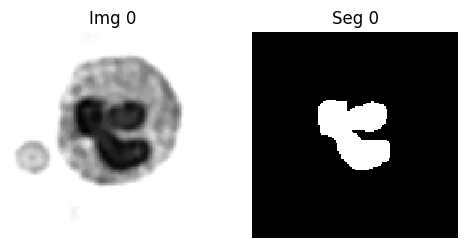

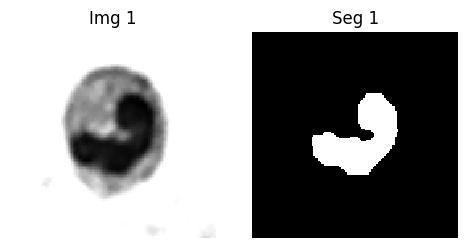

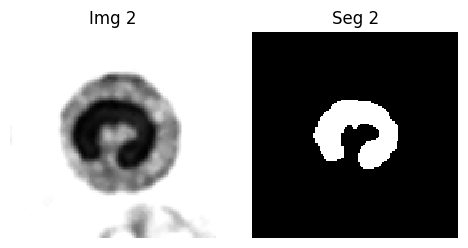

In [39]:
for i in range(3):
    img,seg = data[i]
    ne.plot.slices([img, seg], titles=[f'Img {i}', f'Seg {i}'], grid=(1,2), width=5)